## Load the Dataset Telecom Chun Analysis

In [418]:
# Import libraries
## Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [419]:
import os
os.getcwd()

'/Users/birukzewdie/Desktop/Machine_Learning/Machine_learning_Telecom_Churn/Telecom_Churn_Prediction/research'

In [491]:
df = pd.read_csv('data/Telcom_Customer.csv')

# Explore Basic information 
 
 * df.head()
 * df.tail()
 * df.info()
 * df.describe()
 * df.shape()
 

In [492]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [493]:
df.shape

(7043, 21)

In [494]:
## Check description of Numerical values

print(df.describe())
print("\n")
print(df.info())


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-n

# Deal with Missing values if there is any

* df.isna().any()

In [495]:
print(df.isna().any())

print(df.isna().sum())



customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
Total

In [496]:
na_rows = df.isna().any(axis=1)

for index, row in df[na_rows].iterrows():
  # 'axis=1' iterates through columns
  for col in row.index[row.isna()]:
    print(f"Row index: {index}, Column: {col}")

Row index: 488, Column: TotalCharges
Row index: 753, Column: TotalCharges
Row index: 936, Column: TotalCharges
Row index: 1082, Column: TotalCharges
Row index: 1340, Column: TotalCharges
Row index: 3331, Column: TotalCharges
Row index: 3826, Column: TotalCharges
Row index: 4380, Column: TotalCharges
Row index: 5218, Column: TotalCharges
Row index: 6670, Column: TotalCharges
Row index: 6754, Column: TotalCharges


In [497]:
na_indices = np.where(pd.isna(df))
na_indices

(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]),
 array([19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]))

In [498]:
### Row indexes of the missing values
np.where(pd.isna(df))

(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]),
 array([19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]))

In [499]:
## Entire rows of the missing values
df.loc[na_rows]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [500]:
# Find rows with any NaN values
na_rows = df.isna().any(axis=1)

# Filter the dataframe to only those rows
df_na = df.loc[na_rows]

# Print the indices of these rows and the columns with NaN values
for index, row in df_na.iterrows():
    # Identify the columns with NaN values in this specific row
    na_columns = row[row.isna()].index.tolist()
    print(f"Row index: {index}, Columns with NA: {na_columns}")


Row index: 488, Columns with NA: ['TotalCharges']
Row index: 753, Columns with NA: ['TotalCharges']
Row index: 936, Columns with NA: ['TotalCharges']
Row index: 1082, Columns with NA: ['TotalCharges']
Row index: 1340, Columns with NA: ['TotalCharges']
Row index: 3331, Columns with NA: ['TotalCharges']
Row index: 3826, Columns with NA: ['TotalCharges']
Row index: 4380, Columns with NA: ['TotalCharges']
Row index: 5218, Columns with NA: ['TotalCharges']
Row index: 6670, Columns with NA: ['TotalCharges']
Row index: 6754, Columns with NA: ['TotalCharges']


In [501]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


#### Drop missing values

In [502]:
df = df.dropna()     

In [503]:
print(df['tenure'].unique())
print('\n')
print(df['tenure'].max())

[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]


72


In [424]:
### Let's group tenure by 12 months gap.

labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [425]:
df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

# Remove columns that are not required for processing

In [504]:
df.drop(columns=['customerID'], axis=1, inplace=True)

In [505]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [365]:
#df.loc[:, 'TotalCharges'] = df['TotalCharges'].astype(int)  # Entire column
#df.loc[:, 'MonthlyCharges'] = df['MonthlyCharges'].astype(int)  # Entire column



# Explortory Data Analysis
### Univariant Analysis



Text(0.5, 1.02, 'Count of Churn variable')

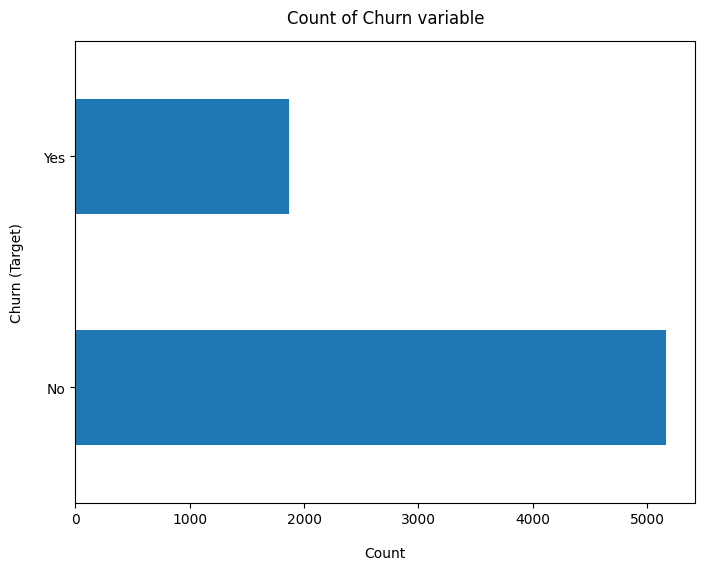

In [506]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Churn (Target)", labelpad=14)
plt.title('Count of Churn variable', y=1.02)

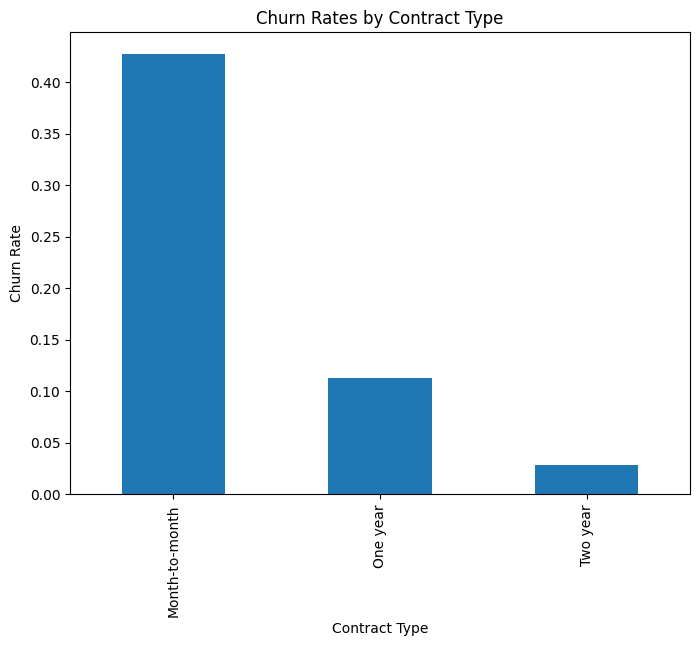

In [143]:
plt.figure(figsize=(8, 6))
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.groupby('Contract')['Churn'].mean().plot(kind='bar')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.title('Churn Rates by Contract Type')
plt.show()

In [465]:
100 * df['Churn'].value_counts()/len(df['Churn'])   # 0 is not churn while 1 is churn

Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64

#### The data is highly imbalanced 

* A little over 73% not churn and about 25.5% churn

Need balance or else it will lead to overfitting

Techinques to deal with Imbalance data

* Upsampling: Creating synthetic records for the lower class - is better because it will have enough data
    

* Downsampling: remove some records from the higher class - so we will leave out part of the higher class



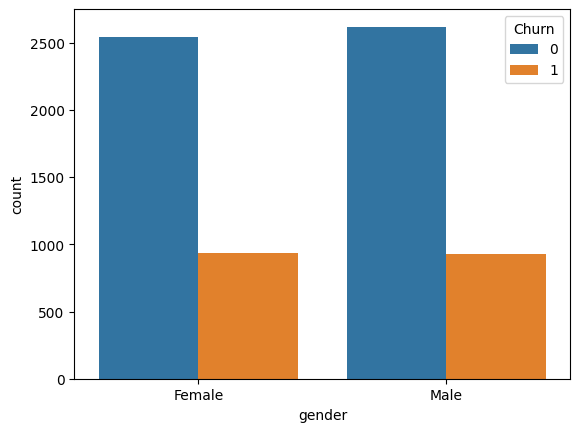

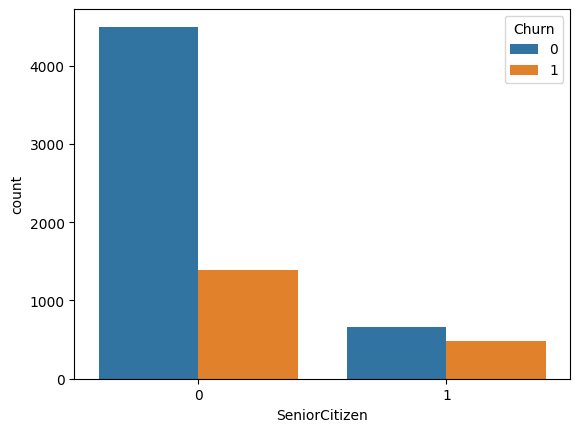

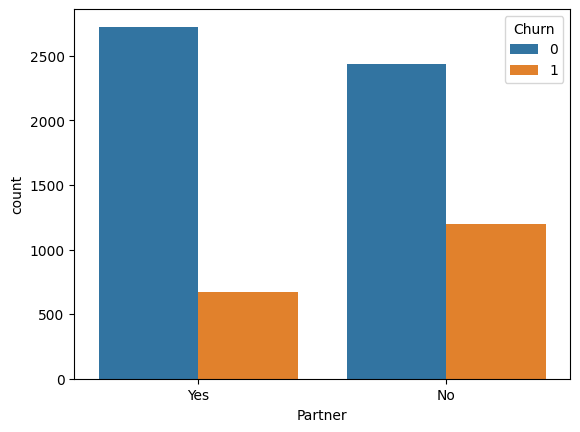

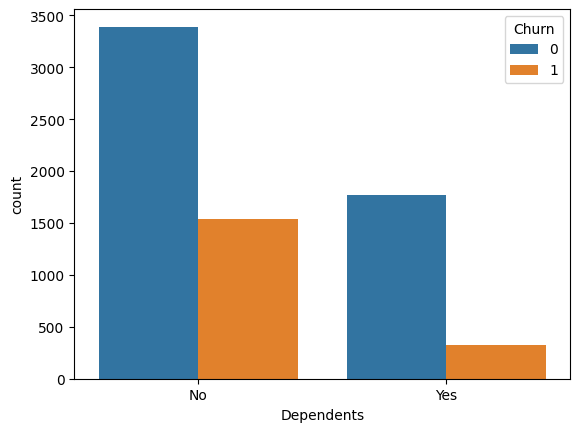

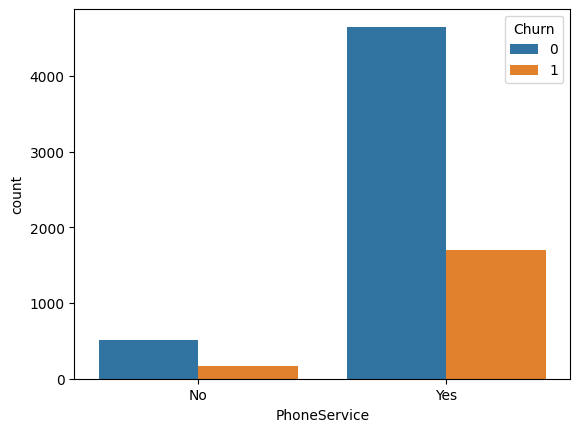

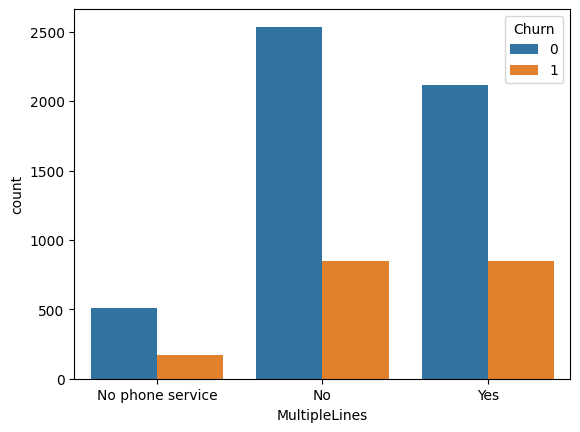

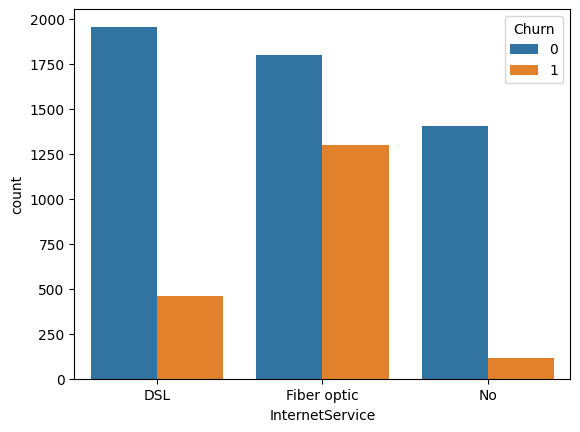

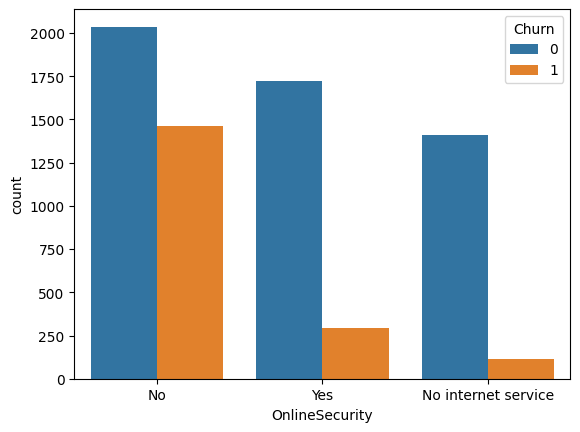

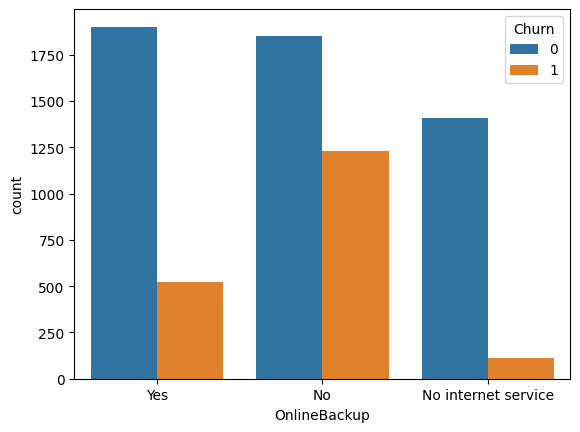

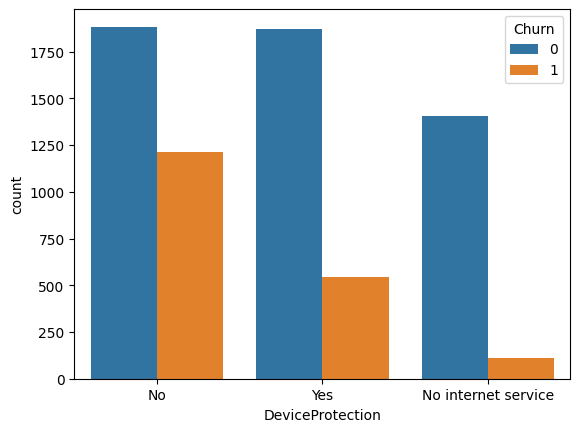

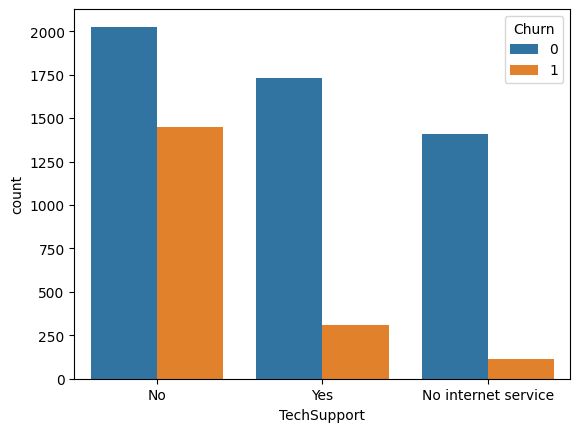

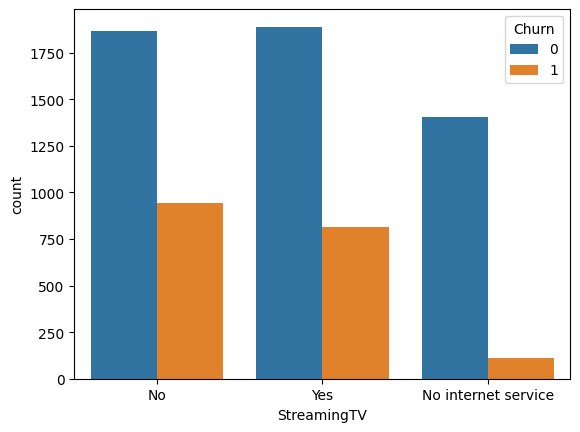

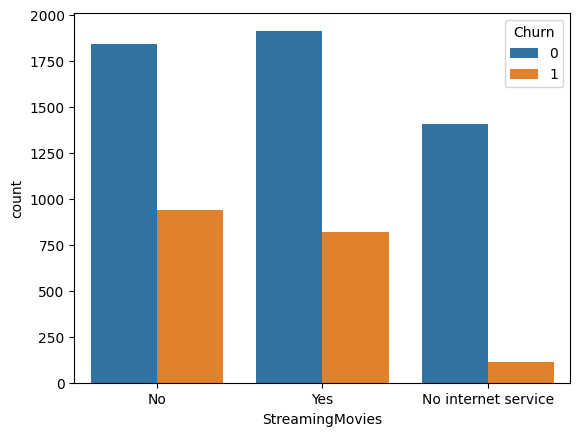

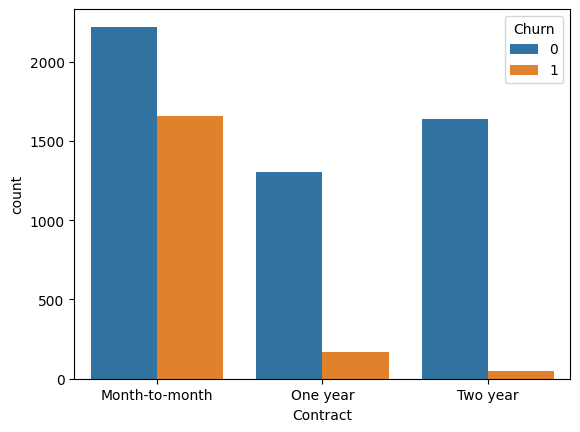

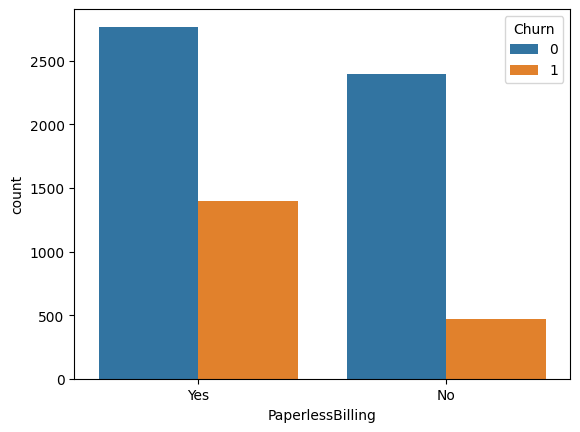

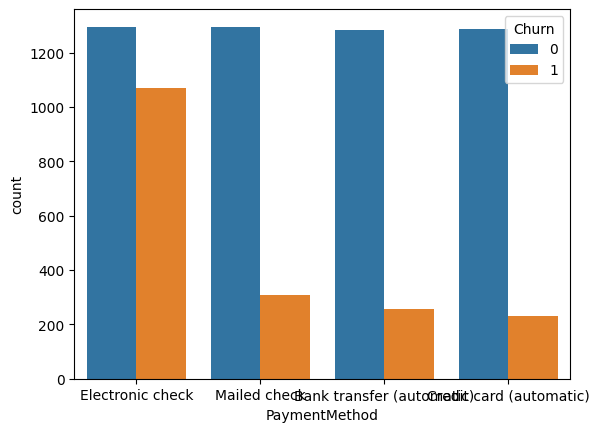

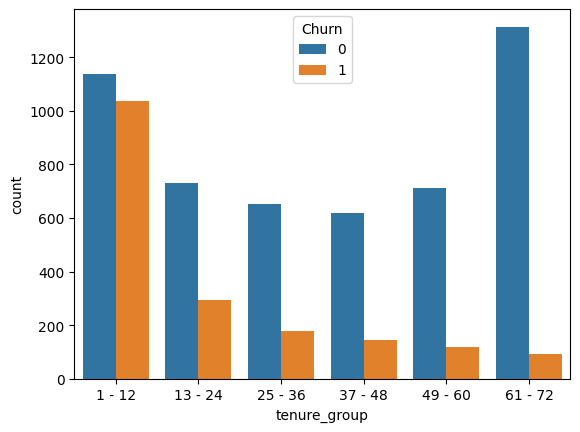

In [148]:
##### Univariate Analysis
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyC

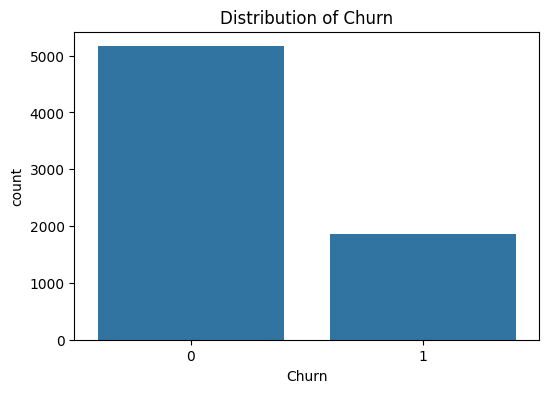

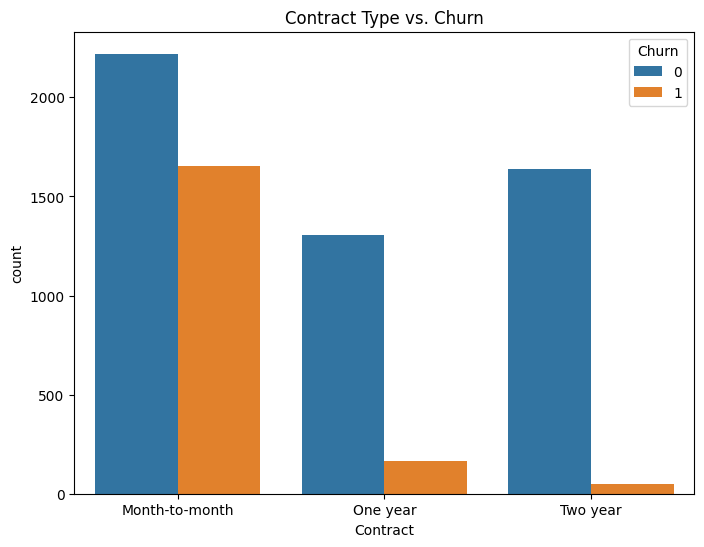

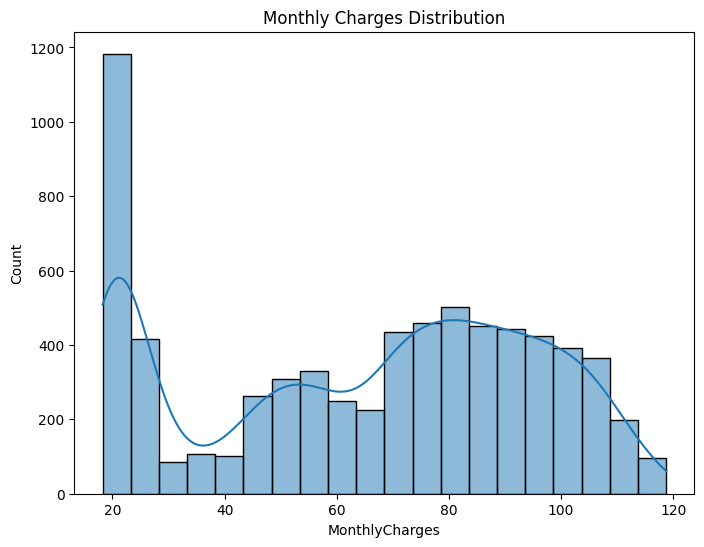

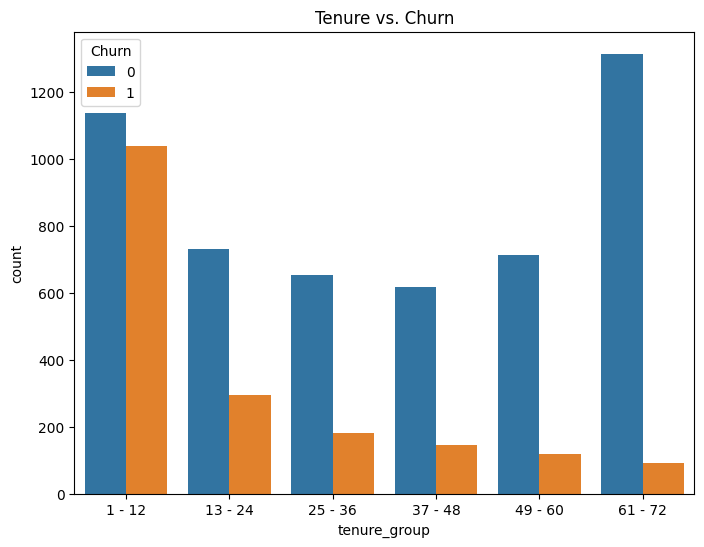

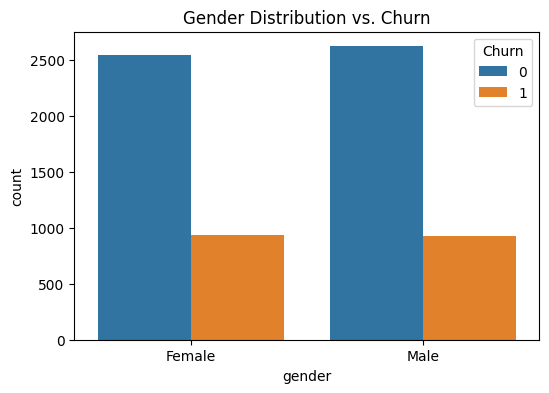

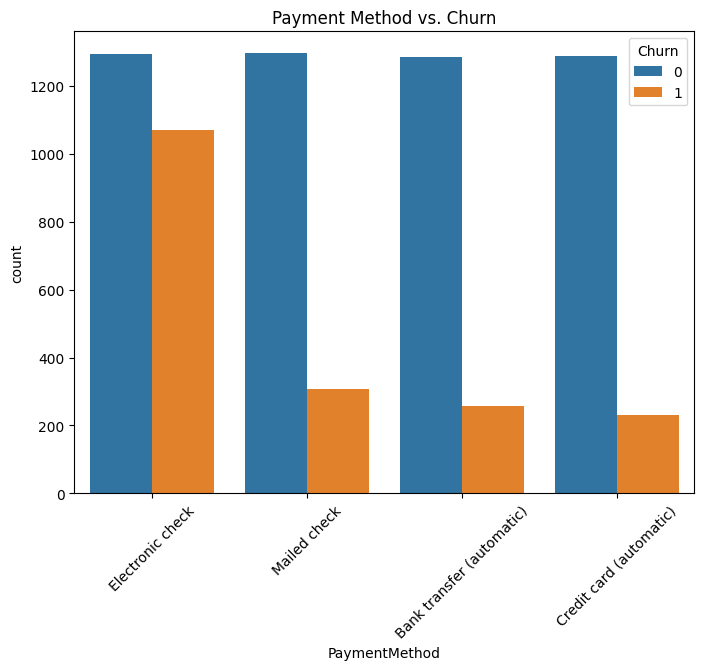

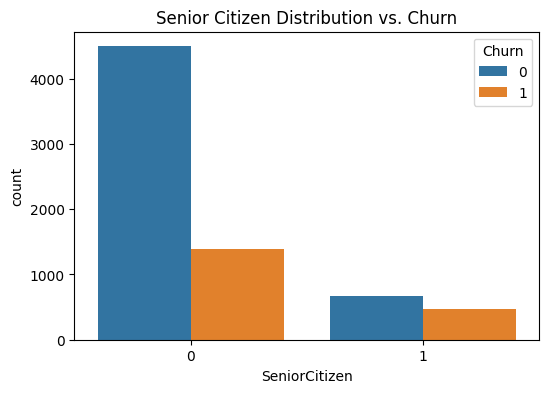

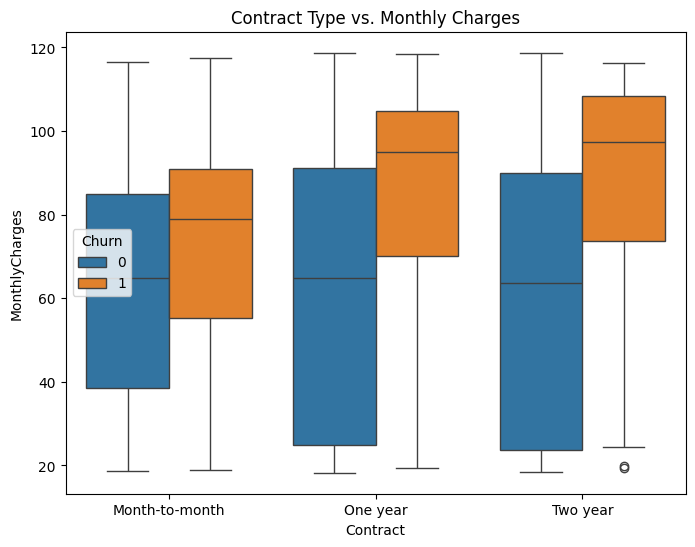

<Figure size 800x600 with 0 Axes>

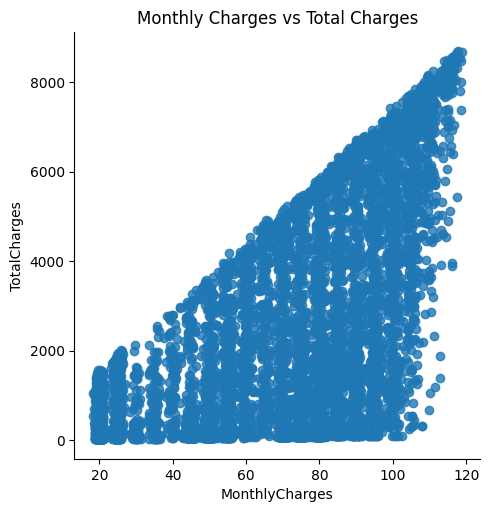

In [164]:
def perform_data_analysis(x):
    
    
    # Display basic information about the dataset
    print("Dataset Information:")
    print(df.info())
    
    # Summary statistics
    print("\nSummary Statistics:")
    print(df.describe())
    
    
    
    # Distribution of Churn
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='Churn')
    plt.title("Distribution of Churn")
    plt.show()

    # Contract type vs. Churn
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='Contract', hue='Churn')
    plt.title("Contract Type vs. Churn")
    plt.show()

    # Monthly charges distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x='MonthlyCharges', bins=20, kde=True)
    plt.title("Monthly Charges Distribution")
    plt.show()

    # Tenure vs. Churn
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, hue='Churn', x='tenure_group')
    plt.title("Tenure vs. Churn")
    plt.show()
    
    # Gender distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='gender', hue='Churn')
    plt.title("Gender Distribution vs. Churn")
    plt.show()

    # Payment method distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='PaymentMethod', hue='Churn')
    plt.xticks(rotation=45)
    plt.title("Payment Method vs. Churn")
    plt.show()
    
    # SeniorCitizen vs. Churn
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
    plt.title("Senior Citizen Distribution vs. Churn")
    plt.show()

    # Contract vs. Monthly Charges
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')
    plt.title("Contract Type vs. Monthly Charges")
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.lmplot(data=df, x='MonthlyCharges', y='TotalCharges', fit_reg=False)
    plt.title('Monthly Charges vs Total Charges')
    plt.show()

# Call the function with the dataset path
perform_data_analysis('Telcom_customer.csv')

# Handle Categorical Variables

* Encode categorical vars using label encoding /  one-hot encoding


* Label encoding: example- male 1, female 0, bias - models understand numbers - we have to careful not to mislead the model.
it could give a higher priority or higher weight to the one labelled with bigger number. Only used for target variables or y var

* One-hot encoding: create more features for each categories and assign 0/1 based on the value. - Computationally more costly.

* Dummy Trap: If you ignore one dummy variable becuse knowing the value of the others could tell the model what the ignored variable is.



In [440]:
df_copy = df.copy()

In [466]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                     'Contract', 'PaperlessBilling', 'PaymentMethod']

In [467]:
encoded_data = pd.get_dummies(df,columns=categorical_cols, drop_first=True, dtype=int)  

In [443]:
#encoded_data['Churn'] = encoded_data['Churn'].map({'Yes': 1, 'No': 0})

In [468]:
encoded_data.head()


,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,No,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,Yes,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,No,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,Yes,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [471]:
print(encoded_data.dtypes)
print(encoded_data.shape)

tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                int64
SeniorCitizen_1                            int64
Partner_Yes                                int64
Dependents_Yes                             int64
PhoneService_Yes                           int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                       int64
TechSupport_No internet service            int64
TechSupport_Yes     

In [470]:
encoded_data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
encoded_data['Churn'].replace(to_replace='No',  value=0, inplace=True)

/var/folders/h4/4f1dd3392y134gkcvw6sfk1r0000gn/T/ipykernel_55706/2602164606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  encoded_data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
/var/folders/h4/4f1dd3392y134gkcvw6sfk1r0000gn/T/ipykernel_55706/2602164606.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

<Axes: >

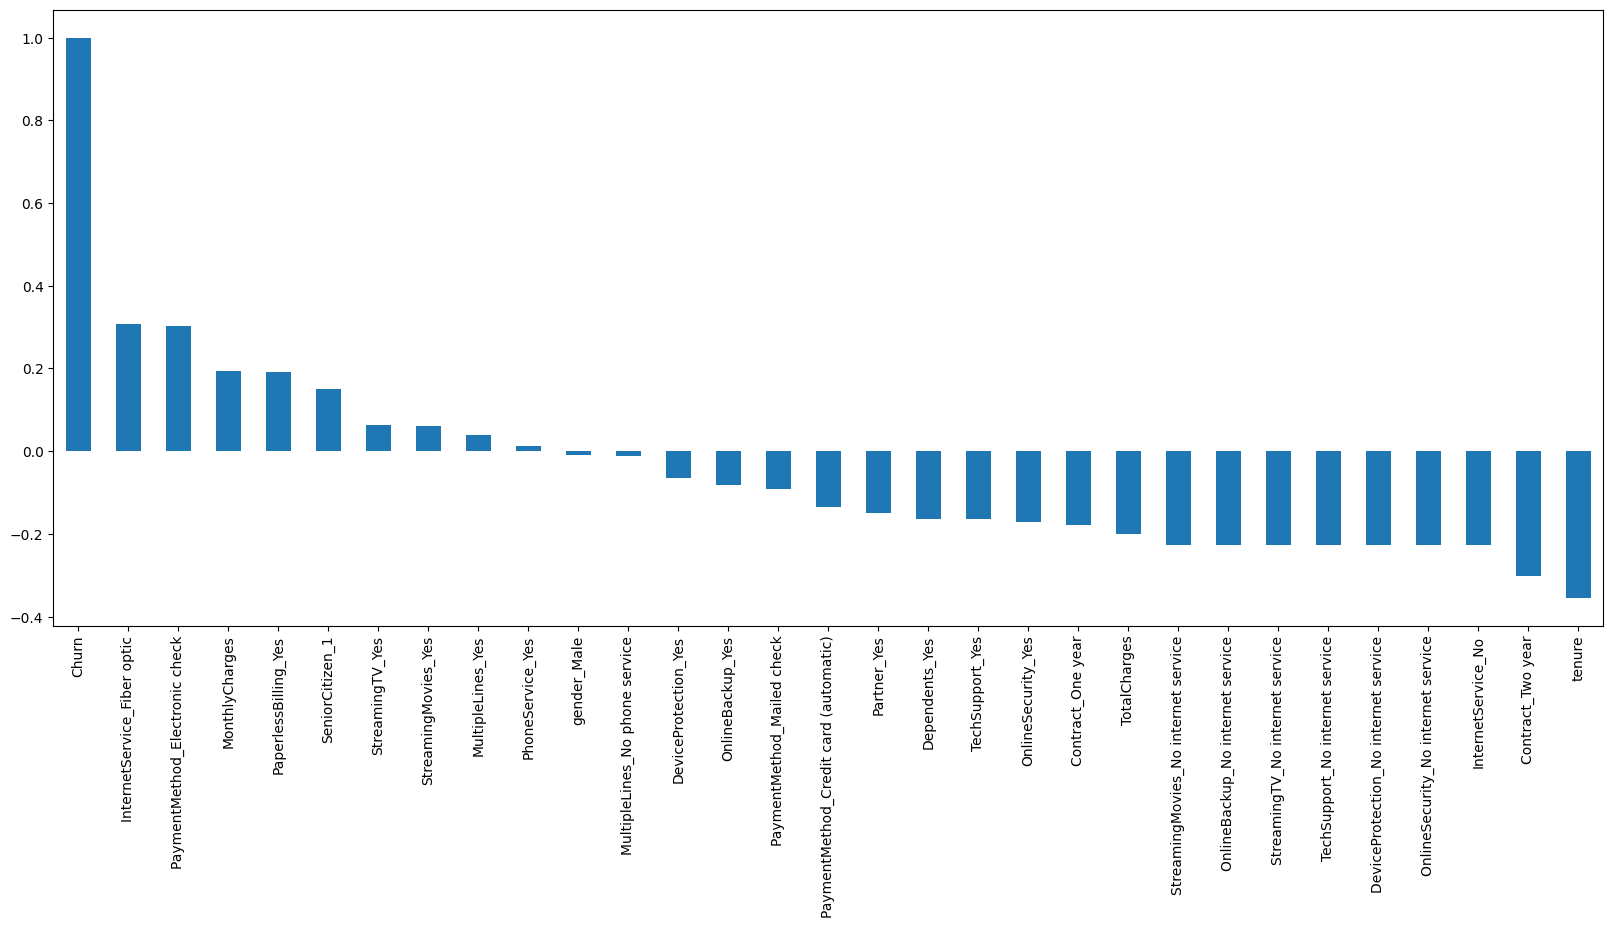

In [472]:
plt.figure(figsize=(20,8))
encoded_data.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

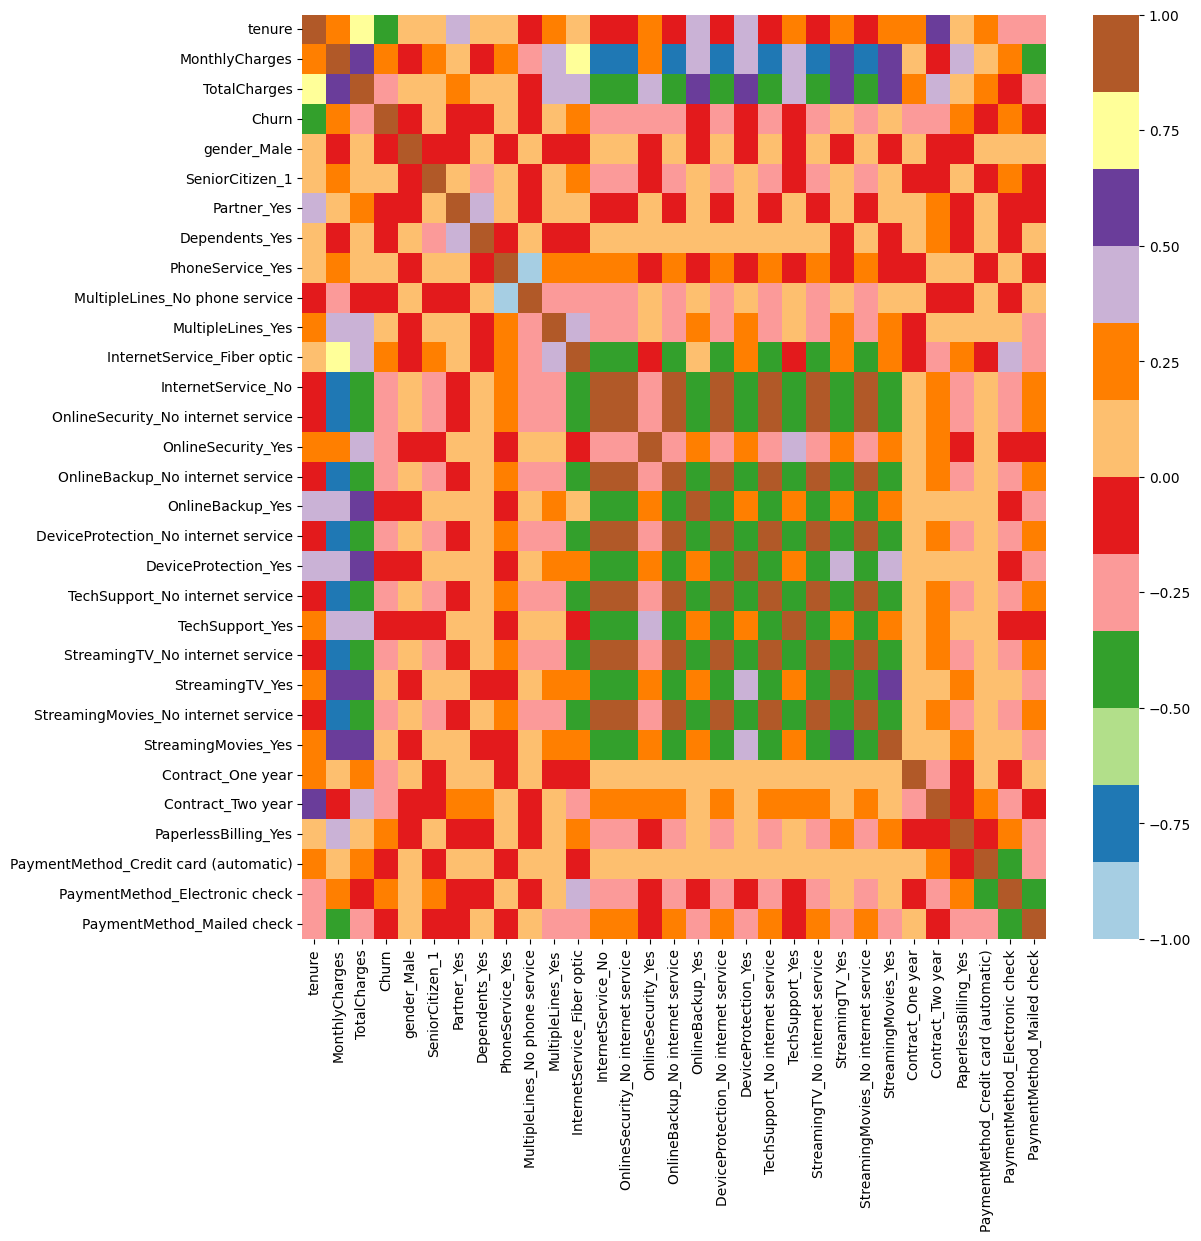

In [473]:
plt.figure(figsize=(12,12))
sns.heatmap(encoded_data.corr(), cmap='Paired')

In [144]:
#### Before machine learning model:

# 1. Handle categorical variable
# 2. Normalization/Scaling/standardizing 

# Churn Prediction Model



In [386]:
encoded_data.to_csv('data/tel_churn.csv')

##### Before model training we need to normalize the dataset

In [387]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)
df['tenure_group'] = df['tenure_group'].astype(str)

In [507]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [508]:
# Assuming 'Yes' means churn and 'No' means no churn



In [529]:
X = df.drop(columns=['Churn'], axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [522]:
df['Churn'] = df['Churn'].astype('category')

In [525]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [524]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [530]:
y = df['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: category
Categories (2, int64): [0, 1]

In [527]:
'''
X = encoded_data.drop(columns=['Churn'], axis=1)
print(X.head())
y = encoded_data['Churn']
y.head()
'''

"\nX = encoded_data.drop(columns=['Churn'], axis=1)\nprint(X.head())\ny = encoded_data['Churn']\ny.head()\n"

In [531]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns
print(num_features)
print(cat_features)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [558]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import recall_score, roc_auc_score, confusion_matrix

In [533]:
##### Scale/Normalize and then  OneHot Encoder then transform the column.
## sklearn.preprocessing has OneHotEncoder and StandardScaler
## sklearn.compose has ColumnTransformer

numeric_transformer = StandardScaler()
one_hot_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", one_hot_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]


)

preprocessor
X = preprocessor.fit_transform(X)


In [479]:
numeric_transformer = StandardScaler()
#one_hot_transformer = OneHotEncoder()

numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer([("StandardScaler", numeric_transformer, num_features)])
X = preprocessor.fit_transform(X)

In [535]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: category
Categories (2, int64): [0, 1]

In [534]:
X  # Array

array([[ 1.        ,  0.        ,  0.        , ..., -1.28024804,
        -1.16169394, -0.99419409],
       [ 0.        ,  1.        ,  1.        , ...,  0.06430269,
        -0.26087792, -0.17373982],
       [ 0.        ,  1.        ,  1.        , ..., -1.23950408,
        -0.36392329, -0.95964911],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.87280842,
        -1.17000405, -0.85451414],
       [ 0.        ,  1.        ,  0.        , ..., -1.15801615,
         0.31916782, -0.87209546],
       [ 0.        ,  1.        ,  1.        , ...,  1.36810945,
         1.35793167,  2.01234407]])

# Train Test Split


80%/ 20%

In [545]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
X_train.shape, X_test.shape

((6328, 45), (704, 45))

In [546]:
print('Original dataset shape %s' % Counter(y_test))

smote = SMOTE(random_state=42)
X_tes, y_tes = smote.fit_resample(X_test, y_test)

print('Resampled dataset shape %s' % Counter(y_tes))

Original dataset shape Counter({0: 557, 1: 147})
Resampled dataset shape Counter({0: 557, 1: 557})


In [547]:
print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 4606, 1: 1722})
Resampled dataset shape Counter({0: 4606, 1: 4606})


In [548]:
def evaluete_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    f1= f1_score(true, predicted)
    precision = precision_score(true, predicted)
    #jaccard_score = jaccard_score(true, predicted)
    return accuracy, f1, precision

In [556]:
models = {
    'Logistic Regression': LogisticRegression(C=0.1, penalty='l2'),
    'K-Neighbors Classfication': KNeighborsClassifier(),
    'Decision Tree Classification': DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8),
    'Random Forest Classification': RandomForestClassifier(n_estimators= 500, criterion='gini',random_state=100, max_depth=10, max_features='sqrt',min_samples_leaf=1),
    'XGB Classification': XGBClassifier(max_depth=3, min_child_weight=1, gamma=0.1, reg_alpha=0.01, reg_lambda=1.0),
    'Cat Boost Classification': CatBoostClassifier(depth=6, l2_leaf_reg=3 ,iterations=1000, early_stopping_rounds=50, verbose=False)
} 

In [550]:
model_list = []
acc_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_res, y_res)

    y_train_pred = model.predict(X_res)
    y_test_pred = model.predict(X_tes)

    acc_train, f1_train, prec_train = evaluete_model(y_res, y_train_pred)
    acc_test, f1_test, prec_test= evaluete_model(y_tes, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Training set')
    print("- Accuracy: {:.4f}".format(acc_train))
    print("- f1_score: {:.4f}".format(f1_train))
    print("- Precision: {:.4f}".format(prec_train))
    

    print('----------------------------------------')

    print('Model Performance for Test set')
    print("- Accuracy: {:.4f}".format(acc_test))
    print("- f1_score: {:.4f}".format(f1_test))
    print("- Precision: {:.4f}".format(prec_test))
    acc_list.append(acc_test)

    print("=" *35)
    print('\n')

Logistic Regression
Model Performance for Training set
- Accuracy: 0.7754
- f1_score: 0.7830
- Precision: 0.7574
----------------------------------------
Model Performance for Test set
- Accuracy: 0.7424
- f1_score: 0.7467
- Precision: 0.7344


K-Neighbors Classfication
Model Performance for Training set
- Accuracy: 0.8520
- f1_score: 0.8660
- Precision: 0.7915
----------------------------------------
Model Performance for Test set
- Accuracy: 0.7397
- f1_score: 0.7487
- Precision: 0.7236


Decision Tree Classification
Model Performance for Training set
- Accuracy: 0.8002
- f1_score: 0.8075
- Precision: 0.7788
----------------------------------------
Model Performance for Test set
- Accuracy: 0.8025
- f1_score: 0.8123
- Precision: 0.7740


Random Forest Classification
Model Performance for Training set
- Accuracy: 0.8161
- f1_score: 0.8241
- Precision: 0.7899
----------------------------------------
Model Performance for Test set
- Accuracy: 0.7944
- f1_score: 0.8021
- Precision: 0.773

In [557]:
with open('model_performance.txt', 'w') as f:
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_res, y_res)

        y_train_pred = model.predict(X_res)
        y_test_pred = model.predict(X_tes)

        acc_train, f1_train, prec_train = evaluete_model(y_res, y_train_pred)
        acc_test, f1_test, prec_test= evaluete_model(y_tes, y_test_pred)

        f.write(f"{list(models.keys())[i]}\n")
        f.write('Model Performance for Training set\n')
        f.write(f"- Accuracy: {acc_train:.4f}\n")
        f.write(f"- f1_score: {f1_train:.4f}\n")
        f.write(f"- Precision: {prec_train:.4f}\n")
        f.write('----------------------------------------\n')
        f.write('Model Performance for Test set\n')
        f.write(f"- Accuracy: {acc_test:.4f}\n")
        f.write(f"- f1_score: {f1_test:.4f}\n")
        f.write(f"- Precision: {prec_test:.4f}\n")
        f.write("=" * 35)
        f.write('\n\n')


# Decision Tree Classifier

In [543]:
dec = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [544]:
dec.fit(X_res, y_res)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [309]:
y_train_pred = dec.predict(X_res)
y_train_pred

array([0, 0, 1, ..., 1, 1, 1])

In [310]:
y_test_pred = model.predict(X_tes)
y_test_pred

array([1, 0, 0, ..., 1, 1, 1])

In [311]:
print(classification_report(y_tes, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1052
           1       0.86      0.83      0.84      1052

    accuracy                           0.85      2104
   macro avg       0.85      0.85      0.85      2104
weighted avg       0.85      0.85      0.85      2104



In [542]:
print(confusion_matrix(y_tes, y_test_pred))

[[907 145]
 [175 877]]


# XGB 

In [562]:
print(X_res.shape)
print(y_res.shape)
print('\n')
print(X_tes.shape)
print(y_tes.shape)

(9212, 45)
(9212,)


(1114, 45)
(1114,)


In [568]:
xgb=XGBClassifier(max_depth=3, min_child_weight=1, gamma=0.1, reg_alpha=0.01, reg_lambda=1.0)
xgb.fit(X_res, y_res)

y_train_pred = xgb.predict(X_res)
print(y_train_pred)

y_test_pred = xgb.predict(X_tes)
print(y_test_pred)


[0 1 0 ... 1 1 1]
[1 0 0 ... 1 1 1]


In [569]:
print(classification_report(y_tes, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       557
           1       0.88      0.89      0.88       557

    accuracy                           0.88      1114
   macro avg       0.88      0.88      0.88      1114
weighted avg       0.88      0.88      0.88      1114



In [570]:
y_pred_proba = xgb.predict_proba(X_tes)[:, 1]
y_pred_proba

array([0.771146  , 0.09624447, 0.40802985, ..., 0.9974957 , 0.99885464,
       0.94045055], dtype=float32)

In [576]:
XGB_results_df = pd.DataFrame({
    'True_Labels': y_tes,
    'Predicted_Labels': y_test_pred,
    'Predicted_Probabilities': y_pred_proba
})

XGB_results_df['Churn_Classification'] = XGB_results_df['Predicted_Probabilities'].apply(lambda x: 'Churn' if x > 0.5 else 'Not Churn')


In [578]:
XGB_results_df.tail()

,True_Labels,Predicted_Labels,Predicted_Probabilities,Churn_Classification
1109,1,1,0.999175,Churn
1110,1,1,0.998993,Churn
1111,1,1,0.997496,Churn
1112,1,1,0.998855,Churn
1113,1,1,0.940451,Churn


In [579]:
XGB_results_df.to_csv('XGB_model_predictions.csv', index=False)

# Save Model


In [580]:
import pickle


filename = 'xgb_model.sav'

pickle.dump(xgb, open(filename, 'wb'))

In [581]:
load_model = pickle.load(open(filename, 'rb'))